# Stock market price for Tesla

## Documentation of the researcher for the most suited algorithm for the specified use case.

For stock price prediction on the closing price regression algorithm is suited. 
How evver if the goal is to predicts whether the closing price of stock will increase or decrease the next day classification is best suited.

In this case the goal is to predict the closing price for one specific date so therefore the regression algorithm is best suited in this case.

Source: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9154061&isnumber=9153968

### stepps preformed To Train the algorithem en get a model

In [33]:
#imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')

from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [34]:
#read the file
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv"
df = pd.read_csv(url)

In [35]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [36]:
df.shape

(2845, 7)

In [37]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] =  df['Date'].map(dt.datetime.toordinal)

In [38]:
# Keep only the 'Close' Value' ,'Date' and the index
df = df[['Date','Close']]

In [39]:
df.head()

,Date,Close
0,733952,4.778
1,733953,4.766
2,733954,4.392
3,733955,3.840
4,733959,3.222


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2845 non-null   int64  
 1   Close   2845 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 44.6 KB


Text(0, 0.5, 'close price USD ($)')

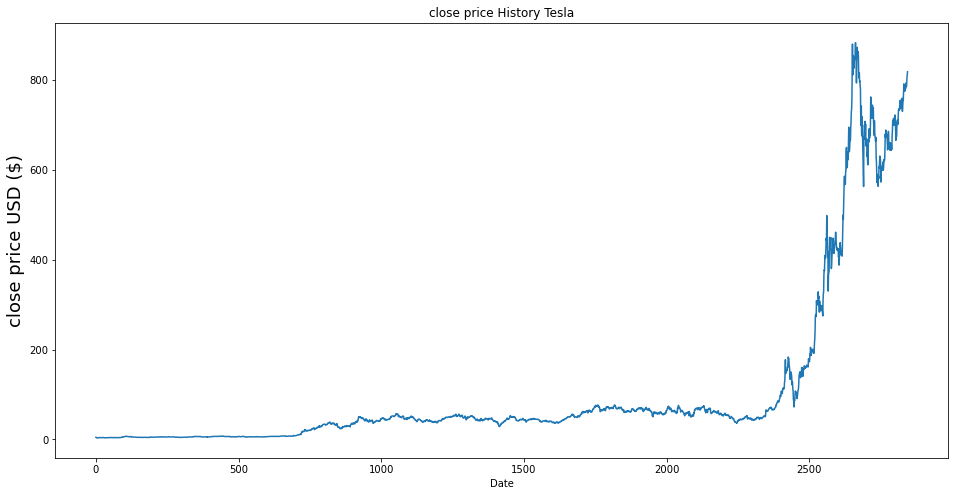

In [41]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('close price History Tesla')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('close price USD ($)', fontsize=18)

Splitting data into test set before training the algorithem.

In [42]:
X = pd.DataFrame(df['Date'])
y = pd.DataFrame(df['Close'])
# splitt the set in traing and testing set
#test_size = 0.33 tell the function that 1/3 of valuess should beput in test arrey
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Her skla algoritmen trenes så vi får en modell

In [43]:
#Now lets train a algorithem
DTR = DecisionTreeRegressor()#definerer algoritmen og som object i variabelen regression
DTR.fit(X_train, y_train) #train
Y_pred = DTR.predict(X_train)#make prediction
print("MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) #Calculate MSE
#godd MSE score on the train data

MSE = 0.0


In [44]:
#Lets manually check with a row  from the  Tesla.csv dataset (dt) 
#her we chec whit index 2 wher Date = 733954 = 2010-07-01
DTR.predict([[733954]]) #Expected output = 4.392

array([4.392])

In [45]:
#make prediction on test dataset
Y_pred = DTR.predict(X_test)#make prediction on X_test
#Calculate MSE to xhec the preformence on test data
print("MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

MSE = 43.96705726111283


In [46]:
#testing on un sen data(new data from TSL_Test.csv)
DTR.predict([[738085]]) 
#Expected output = 909.679993 
#the data is from data whit Date = 2021-10-22 = 738085

array([818.320007])

In [47]:

#prepper to save the models
#models = []

In [48]:
#function to save the model
#import pickle
#save the model to disk
#filename = 'model.sav'
#pickle.dump(modells[0], oppen(filename, 'wb'))

########################################
#load the model again, and test to se if it works.
#loade_model = pickle.load(oppen(filename, 'rb'))
#loade_model.predict([[]]) #toordinal